In [11]:
X.shape, y.shape

((442, 10), (442,))

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Реализованный PCA

In [2]:
from pca import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(
    f"Без PCA: R2 = {reg.score(X_test, y_test):.4f}, MSE = {mean_squared_error(y_test, y_pred):.4f}"
)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

reg_pca = LinearRegression().fit(X_train_pca, y_train)
y_pred_pca = reg_pca.predict(X_test_pca)
print(
    f"С PCA (4 dim): R2 = {reg_pca.score(X_test_pca, y_test):.4f}, MSE = {mean_squared_error(y_test, y_pred_pca):.4f}"
)

Без PCA: R2 = 0.4526, MSE = 2900.1936
С PCA (4 dim): R2 = 0.4580, MSE = 2871.8080


## Эталонный PCA

In [3]:
from sklearn.decomposition import PCA as PCA_sklearn

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(
    f"Без PCA: R2 = {reg.score(X_test, y_test):.4f}, MSE = {mean_squared_error(y_test, y_pred):.4f}"
)

sklearn_pca = PCA_sklearn(n_components=4)
X_train_pca = sklearn_pca.fit_transform(X_train)
X_test_pca = sklearn_pca.transform(X_test)

reg_pca = LinearRegression().fit(X_train_pca, y_train)
y_pred_pca = reg_pca.predict(X_test_pca)
print(
    f"С PCA (4 dim): R2 = {reg_pca.score(X_test_pca, y_test):.4f}, MSE = {mean_squared_error(y_test, y_pred_pca):.4f}"
)

Без PCA: R2 = 0.4526, MSE = 2900.1936
С PCA (4 dim): R2 = 0.4580, MSE = 2871.8080


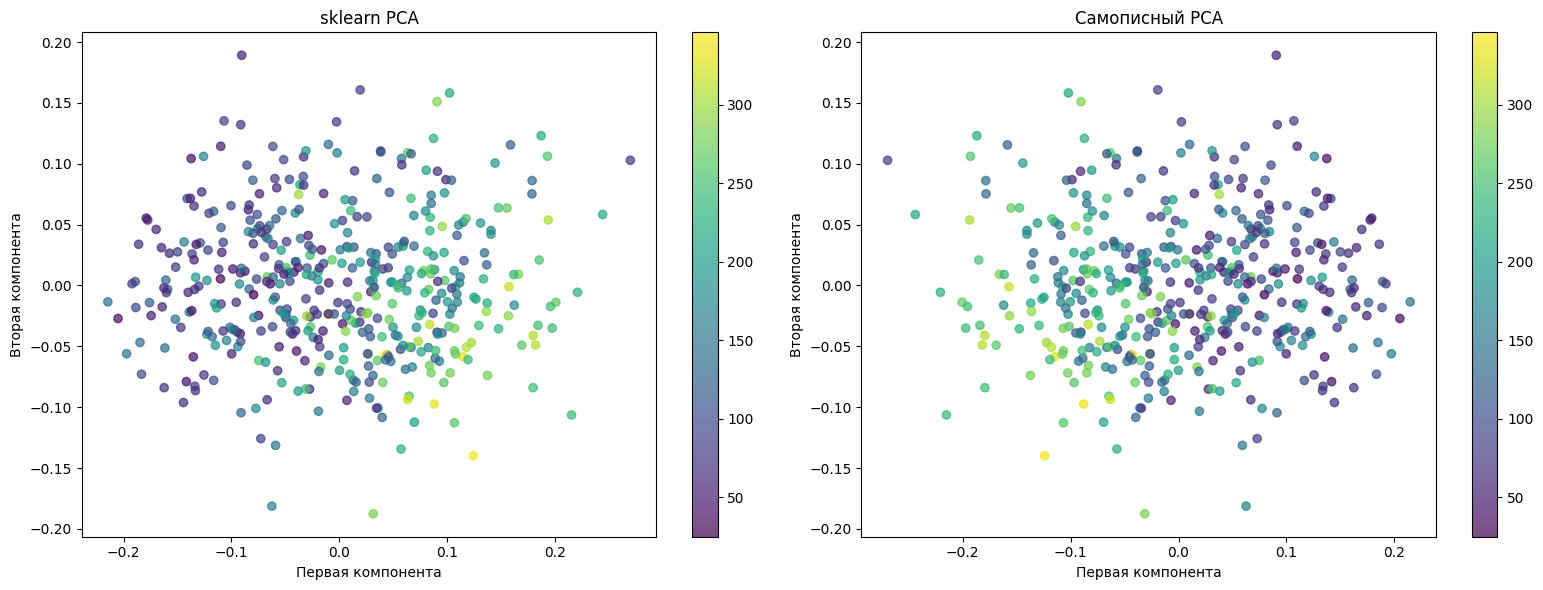

In [4]:
import matplotlib.pyplot as plt

pca_sklearn = PCA_sklearn(n_components=2)
X_pca_sklearn = pca_sklearn.fit_transform(X)

pca_my = PCA(n_components=2)
X_pca_my = pca_my.fit_transform(X)

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca_sklearn[:, 0], X_pca_sklearn[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.colorbar()
plt.title("sklearn PCA")
plt.xlabel("Первая компонента")
plt.ylabel("Вторая компонента")

plt.subplot(1, 2, 2)
plt.scatter(X_pca_my[:, 0], X_pca_my[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.colorbar()
plt.title("Самописный PCA")
plt.xlabel("Первая компонента")
plt.ylabel("Вторая компонента")

plt.tight_layout()
plt.show()


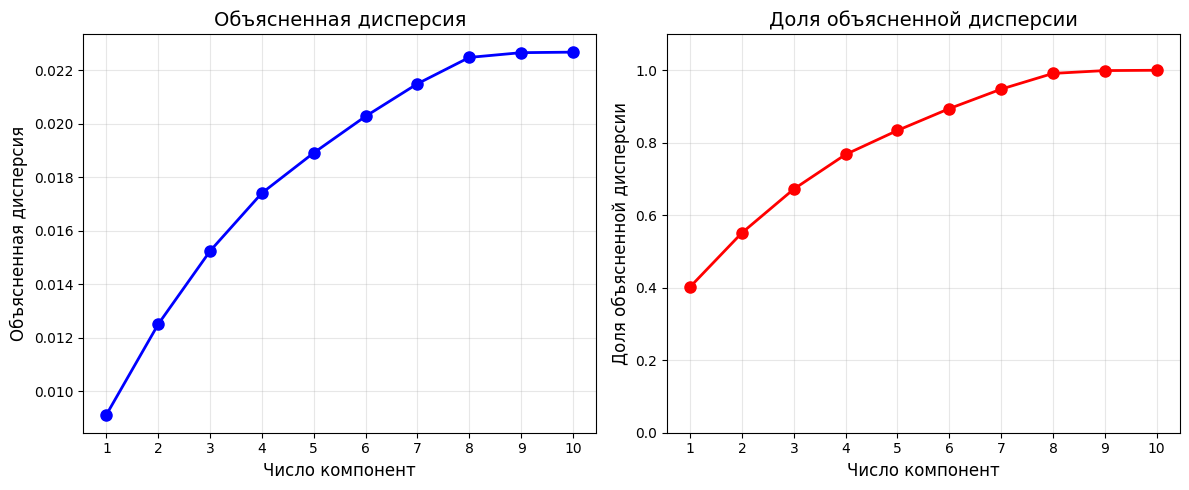

Доля объясненной дисперсии по компонентам:
 1 компонент(а): 0.4024 (40.24%)
 2 компонент(а): 0.5517 (55.17%)
 3 компонент(а): 0.6722 (67.22%)
 4 компонент(а): 0.7678 (76.78%)
 5 компонент(а): 0.8340 (83.40%)
 6 компонент(а): 0.8943 (89.43%)
 7 компонент(а): 0.9479 (94.79%)
 8 компонент(а): 0.9913 (99.13%)
 9 компонент(а): 0.9991 (99.91%)
 10 компонент(а): 1.0000 (100.00%)


In [13]:
import numpy as np

X_centered = X - np.mean(X, axis=0)
_, s_full, _ = np.linalg.svd(X_centered, full_matrices=False)
total_variance = np.sum(s_full**2) / (X.shape[0] - 1)

n_features = X.shape[1]
explained_variances = []
explained_variance_ratios = []

for n_comp in range(1, n_features + 1):
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    explained_variances.append(pca.explained_variance_)

    explained_variance_ratio = np.sum(pca.explained_variance_) / total_variance
    explained_variance_ratios.append(explained_variance_ratio)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(
    range(1, n_features + 1),
    [np.sum(ev) for ev in explained_variances],
    "bo-",
    linewidth=2,
    markersize=8,
)
plt.xlabel("Число компонент", fontsize=12)
plt.ylabel("Объясненная дисперсия", fontsize=12)
plt.title("Объясненная дисперсия", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, n_features + 1))

plt.subplot(1, 2, 2)
plt.plot(
    range(1, n_features + 1),
    explained_variance_ratios,
    "ro-",
    linewidth=2,
    markersize=8,
)
plt.xlabel("Число компонент", fontsize=12)
plt.ylabel("Доля объясненной дисперсии", fontsize=12)
plt.title("Доля объясненной дисперсии", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, n_features + 1))
plt.ylim([0, 1.1])

plt.tight_layout()
plt.savefig("../misc/dispersions.png")
plt.show()

print("Доля объясненной дисперсии по компонентам:")
for i, ratio in enumerate(explained_variance_ratios[:10], 1):
    print(f" {i} компонент(а): {ratio:.4f} ({ratio * 100:.2f}%)")

In [14]:
from sklearn.decomposition import PCA as PCA_sklearn

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(
    f"Без PCA: R2 = {reg.score(X_test, y_test):.4f}, MSE = {mean_squared_error(y_test, y_pred):.4f}"
)

sklearn_pca = PCA_sklearn(n_components=8)
X_train_pca = sklearn_pca.fit_transform(X_train)
X_test_pca = sklearn_pca.transform(X_test)

reg_pca = LinearRegression().fit(X_train_pca, y_train)
y_pred_pca = reg_pca.predict(X_test_pca)
print(
    f"С PCA (8 dim): R2 = {reg_pca.score(X_test_pca, y_test):.4f}, MSE = {mean_squared_error(y_test, y_pred_pca):.4f}"
)

Без PCA: R2 = 0.4526, MSE = 2900.1936
С PCA (8 dim): R2 = 0.4557, MSE = 2884.0049
